In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import cufflinks as cf
import missingno as msno
import unicodedata as ud

from sklearn.feature_extraction.text import CountVectorizer

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('../data_test/data_testing.csv', index_col=None)
df

,Tweet
0,- Dia sendiri yang ngiklanin promo cashback di...
1,- disaat semua cowok berusaha melacak perhatia...
2,- kampret kan kalo typo-nya di email kantor ke...
3,"- Mending makan disini lebih murah, buang-buan..."
4,/biarin oppa masukim vibrator ke memek/ oppa k...
...,...
2011,Yagimanasih anjir gue dirumah doang dari pagi ...
2012,Yah sekian pandangan awam dari saya wkwwk seka...
2013,yang butuh memek hubungi rp haneul terdekat'
2014,Yang sabar gua mah punya adek2 kunyuk yg bau k...


In [3]:
df.shape

(2016, 1)

In [4]:
df.isna().sum()

Tweet    0
dtype: int64

In [5]:
# Character Length

df['Char_Length'] = df.Tweet.apply(lambda x: len(str(x)))
df

,Tweet,Char_Length
0,- Dia sendiri yang ngiklanin promo cashback di...,282
1,- disaat semua cowok berusaha melacak perhatia...,138
2,- kampret kan kalo typo-nya di email kantor ke...,144
3,"- Mending makan disini lebih murah, buang-buan...",285
4,/biarin oppa masukim vibrator ke memek/ oppa k...,97
...,...,...
2011,Yagimanasih anjir gue dirumah doang dari pagi ...,143
2012,Yah sekian pandangan awam dari saya wkwwk seka...,138
2013,yang butuh memek hubungi rp haneul terdekat',44
2014,Yang sabar gua mah punya adek2 kunyuk yg bau k...,61


In [6]:
print(df.Char_Length.describe())

count    2016.000000
mean       96.888889
std        67.674154
min         7.000000
25%        44.000000
50%        80.000000
75%       138.000000
max       561.000000
Name: Char_Length, dtype: float64


In [7]:
# min char length

data_min_char_length = df[df.Char_Length == 7]
data_min_char_length

,Tweet,Char_Length
254,USER //,7
1199,URL &lt,7


In [8]:
# max char length

data_max_char_length = df[df.Char_Length == 561]
data_max_char_length

,Tweet,Char_Length
895,USER anjir.....\n\ngue ngecek berkali kali bua...,561


In [9]:
import re
# from nltk.tokenize import word_tokenize
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [10]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

def casefold(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    return text

def normalize_alay(text):
    alay_dict = pd.read_csv('../dataset/stopwords/kamusalay.csv', encoding='latin-1', header=None)
    alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})
    alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    id_stopword = pd.read_csv('../dataset/stopwords/idstopwords.csv', header=None)
    id_stopword = id_stopword.rename(columns={0: 'stopword'})
    text = ' '.join(['' if word in id_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stopword(text):
    text = normalize_alay(text)
    text = remove_stopword(text)
    return text

def tokenizing(text):
    words = word_tokenize(text)
    return words

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

def preprocessing(text):
    text = casefold(text)
    text = stopword(text)
#   text = tokenizing(text)
#   text = stemming(text)
    return text

df["preprocessing"] = df.Tweet.apply(preprocessing)
df.head()

,Tweet,Char_Length,preprocessing
0,- Dia sendiri yang ngiklanin promo cashback di...,282,mengiklankan promo cashback aplikasinyya pengg...
1,- disaat semua cowok berusaha melacak perhatia...,138,cowok berusaha melacak perhatian lantas remehk...
2,- kampret kan kalo typo-nya di email kantor ke...,144,kampret salah ketik email kantor mengetik serp...
3,"- Mending makan disini lebih murah, buang-buan...",285,mending makan murah buang buang duit tai a bel...
4,/biarin oppa masukim vibrator ke memek/ oppa k...,97,biarkan oppa masukan vibrator memek oppa memas...


In [11]:
# Character Length After Preprocessing

df['Char_Length_Prep'] = df.preprocessing.apply(lambda x: len(str(x)))
df.head()

,Tweet,Char_Length,preprocessing,Char_Length_Prep
0,- Dia sendiri yang ngiklanin promo cashback di...,282,mengiklankan promo cashback aplikasinyya pengg...,184
1,- disaat semua cowok berusaha melacak perhatia...,138,cowok berusaha melacak perhatian lantas remehk...,88
2,- kampret kan kalo typo-nya di email kantor ke...,144,kampret salah ketik email kantor mengetik serp...,61
3,"- Mending makan disini lebih murah, buang-buan...",285,mending makan murah buang buang duit tai a bel...,140
4,/biarin oppa masukim vibrator ke memek/ oppa k...,97,biarkan oppa masukan vibrator memek oppa memas...,62


In [ ]:
# data_preprocessing = df[['Tweet', 'preprocessing']].loc[0:50]
# data_preprocessing

In [ ]:
#  

In [ ]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

df['Char_Length'].iplot(kind='hist',
                        bins=100,
                        xTitle='Character Length',
                        linecolor='black',
                        yTitle='Count',
                        title='Review Text Length Distribution')

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_word = get_top_n_words(df['Tweet'], 10)
common_words = get_top_n_bigram(df['Tweet'], 10)

In [ ]:
# The distribution of top unigrams before removing stop words

df1 = pd.DataFrame(common_word, columns = ['Tweet' , 'count'])
df1.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Words in Review Before Removing Stopwords')

In [ ]:
df1

In [ ]:
# The distribution of top trigrams before removing stop words

df2 = pd.DataFrame(common_words,
                   columns = ['Tweet' , 'count'])

df2.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Trigrams in Review Before Removing Stopwords')

In [ ]:
df2

In [ ]:
# wordcloud

tweet =' '.join([str(text) for text in df.preprocessing])

wordcloud = WordCloud(width=800,
                      height=500,
                      background_color="white",
                      colormap="Dark2",
                      random_state=21,
                      max_font_size=110).generate(tweet)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file("../data_test/wordcloud.png")

In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['Char_Length_Prep'].iplot(
    kind='hist',
    bins=100,
    xTitle='Char_Length_prep',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution After Preprocessing')

In [ ]:
common_word = get_top_n_words(df['preprocessing'], 10)
common_words = get_top_n_bigram(df['preprocessing'], 10)

In [ ]:
common_words

In [ ]:
common_word

In [ ]:
# The distribution of top unigrams after removing stop words

df1_prep = pd.DataFrame(common_word, columns = ['preprocessing' , 'count'])
df1_prep.groupby('preprocessing').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Words in Review After Removing Stopwords')

In [ ]:
# df1_prep.to_csv('../data_test/df1_prep.csv')

In [ ]:
# The distribution of top trigrams before removing stop words

df3_prep = pd.DataFrame(common_words,
                   columns = ['preprocessing' , 'count'])

df3_prep.groupby('preprocessing').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Trigrams in Review Before Removing Stopwords')

In [ ]:
df3_prep

# Predictive Analysis

In [12]:
df

,Tweet,Char_Length,preprocessing,Char_Length_Prep
0,- Dia sendiri yang ngiklanin promo cashback di...,282,mengiklankan promo cashback aplikasinyya pengg...,184
1,- disaat semua cowok berusaha melacak perhatia...,138,cowok berusaha melacak perhatian lantas remehk...,88
2,- kampret kan kalo typo-nya di email kantor ke...,144,kampret salah ketik email kantor mengetik serp...,61
3,"- Mending makan disini lebih murah, buang-buan...",285,mending makan murah buang buang duit tai a bel...,140
4,/biarin oppa masukim vibrator ke memek/ oppa k...,97,biarkan oppa masukan vibrator memek oppa memas...,62
...,...,...,...,...
2011,Yagimanasih anjir gue dirumah doang dari pagi ...,143,anjir rumah doang pagi gange i arah jalan main...,60
2012,Yah sekian pandangan awam dari saya wkwwk seka...,138,sekian pandangan awam wkwk pandangan awam rise...,87
2013,yang butuh memek hubungi rp haneul terdekat',44,butuh memek hubungi rupiah haneul terdekat,42
2014,Yang sabar gua mah punya adek2 kunyuk yg bau k...,61,sabar adek adek kunyuk bau kayak sempak kuda,44


In [13]:
df = df.drop(['Tweet', 'Char_Length', 'Char_Length_Prep'], axis=1)
df = df.rename(columns={'Preprocessing':'Tweet'})
df

,preprocessing
0,mengiklankan promo cashback aplikasinyya pengg...
1,cowok berusaha melacak perhatian lantas remehk...
2,kampret salah ketik email kantor mengetik serp...
3,mending makan murah buang buang duit tai a bel...
4,biarkan oppa masukan vibrator memek oppa memas...
...,...
2011,anjir rumah doang pagi gange i arah jalan main...
2012,sekian pandangan awam wkwk pandangan awam rise...
2013,butuh memek hubungi rupiah haneul terdekat
2014,sabar adek adek kunyuk bau kayak sempak kuda


In [26]:
import joblib

In [27]:
clf = joblib.load('../model/algo_model/model_logreg.jlib')

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,5))

In [29]:
test_tfidf = tfidf.fit_transform(df.preprocessing)

In [30]:
clf.predict(test_tfidf)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [34]:
df[['HS', 'Abusive', 'Neutral']] = clf.predict(test_tfidf)
df

,preprocessing,HS,Abusive,Neutral
0,mengiklankan promo cashback aplikasinyya pengg...,1,0,0
1,cowok berusaha melacak perhatian lantas remehk...,0,0,1
2,kampret salah ketik email kantor mengetik serp...,0,0,0
3,mending makan murah buang buang duit tai a bel...,0,0,1
4,biarkan oppa masukan vibrator memek oppa memas...,0,0,1
...,...,...,...,...
2011,anjir rumah doang pagi gange i arah jalan main...,0,0,0
2012,sekian pandangan awam wkwk pandangan awam rise...,1,0,0
2013,butuh memek hubungi rupiah haneul terdekat,0,0,1
2014,sabar adek adek kunyuk bau kayak sempak kuda,0,1,0


In [36]:
df_predictive_analysis = df.iloc[0:30]
df_predictive_analysis.to_csv('../data_test/df_predictive_analysis.csv')

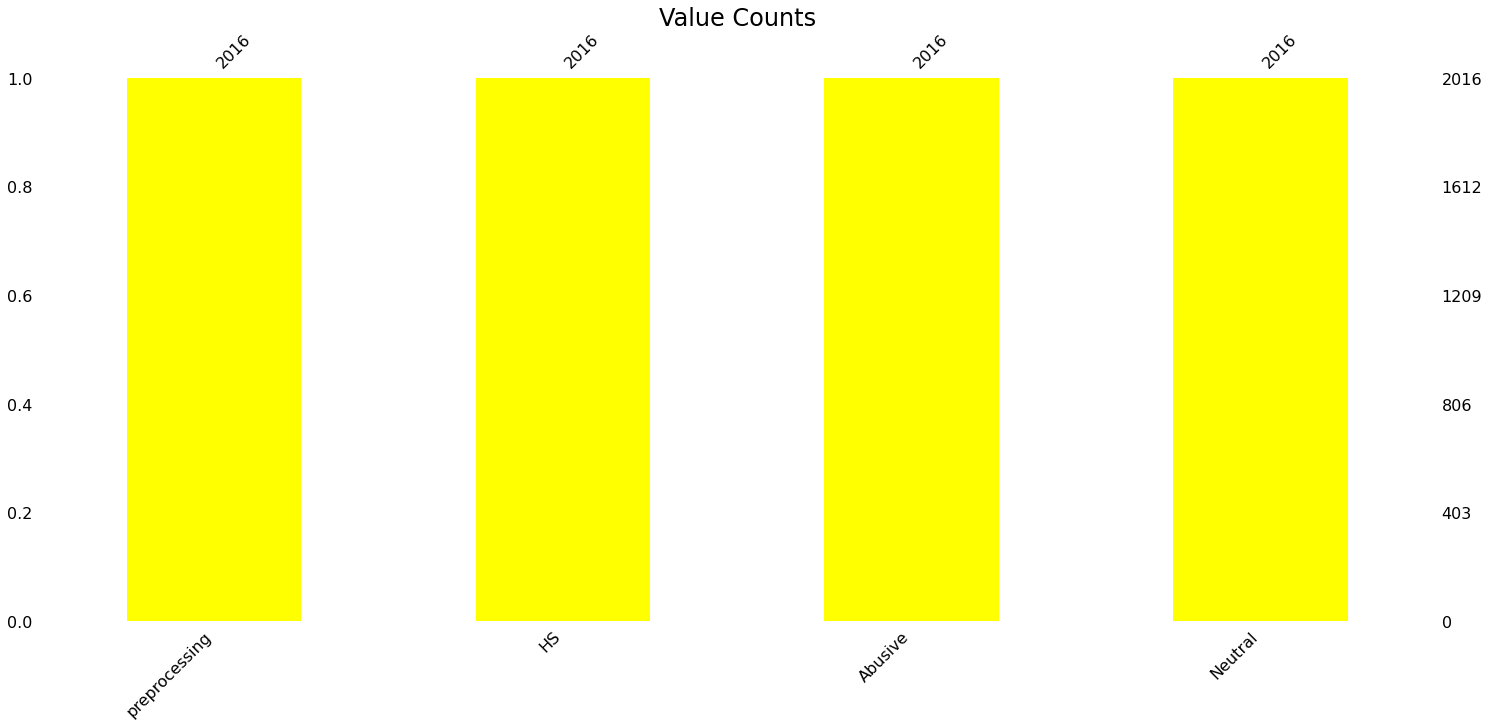

In [40]:
# Visualisasi Missing Values

msno.bar(df, color='yellow')
plt.title('Value Counts', fontsize=24)
plt.show()

In [41]:
# Amount of Data

neutral = df[df['Neutral'] == 1].shape
hate_speech = df[(df['HS'] == 1) & (df['Abusive'] == 0)].shape
abusive = df[(df['HS'] == 0) & (df['Abusive'] == 1)].shape

print(f"Neutral: {neutral}")
print(f"Hate Speech: {hate_speech}")
print(f"Abusive: {abusive}")

Neutral: (1408, 4)
Hate Speech: (94, 4)
Abusive: (137, 4)


In [46]:
# Amount of Data visualization
colormap = plt.cm.plasma
temp = df.groupby(['HS', 'Abusive', 'Neutral']).count()['preprocessing'].reset_index().sort_values(by='preprocessing',ascending=False)
temp.style.background_gradient(cmap=colormap)

,HS,Abusive,Neutral,preprocessing
1,0,0,1,1401
0,0,0,0,310
2,0,1,0,131
4,1,0,0,93
6,1,1,0,74
3,0,1,1,6
5,1,0,1,1
